## Imports

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dir_files = '../Dataset/'
col_labels = [
    'Dev_ID',
    'Acc_X',
    'Acc_Y',
    'Acc_Z',
    'Gyr_X',
    'Gyr_Y',
    'Gyr_Z',
    'Mag_X',
    'Mag_Y',
    'Mag_Z',
    'Timestamp',
    'Act_Label'
]

act_labels = [
    'Stand',
    'Sit',
    'Sit and Talk',
    'Walk',
    'Walk and Talk',
    'Climb Stair',
    'Climb Stair and Talk',
    'Stand to Sit',
    'Sit to Stand',
    'Stand to Sit and Talk',
    'Sit to Stand and Talk',
    'Stand to Walk',
    'Walk to Stand',
    'Stand to Climb Stairs/Climb Stairs and Talk',
    'Climb Stairs to Walk',
    'Climb Stairs and Talk to Walk and Talk'
]

modules_labels = [
    'Acc_N_Out',
    'Acc_N',
    'Acc_Dens',
    'Gyr_N_Out',
    'Gyr_N',
    'Gyr_Dens',
    'Mag_N_Out',
    'Mag_N',
    'Mag_Dens',
]

k_values = [
    3,
    3.5,
    4
]

## Read Files

In [3]:
def read_file(id=0, dev=2):
    file_path = dir_files + 'part' + str(id) + '/part' + str(id) + 'dev' + str(dev) + '.csv'

    csv_file = open(file_path)
    csv_reader = csv.reader(csv_file, delimiter=',')
    data_np = np.array(list(csv_reader)).astype(float)

    data = pd.DataFrame(data_np)
    data.columns = col_labels
    
    return [data,data_np]
    

[data,data_np] = read_file()
data

,Dev_ID,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,Mag_X,Mag_Y,Mag_Z,Timestamp,Act_Label
0,2.0,3.0317,9.0450,3.1739,0.762470,3.70710,-0.313840,0.57764,0.68849,1.26540,63.629,1.0
1,2.0,2.9591,9.0436,3.1400,0.405880,4.66820,-0.101480,0.58385,0.68849,1.27410,83.160,1.0
2,2.0,2.9465,9.0545,3.0799,0.242300,5.52250,0.348570,0.56522,0.67857,1.26750,102.690,1.0
3,2.0,2.7898,9.0528,3.0726,0.498580,6.34630,0.611270,0.56108,0.65476,1.26100,122.220,1.0
4,2.0,2.6924,9.0377,2.9794,0.631970,6.69720,1.005600,0.57764,0.69246,1.26750,141.750,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
52859,2.0,2.3837,9.0681,3.4339,-0.429610,-1.75440,-0.300480,0.35197,0.88294,0.69737,1039200.000,1.0
52860,2.0,2.4075,8.9945,3.3985,-0.279800,-1.72390,0.129850,0.35197,0.86706,0.69079,1039200.000,1.0
52861,2.0,2.3837,9.0316,3.4346,-0.043147,-0.77803,0.195980,0.32919,0.84722,0.69956,1039300.000,1.0
52862,2.0,2.3236,9.0922,3.4472,-0.125830,-0.56445,-0.016121,0.33747,0.88889,0.70614,1039300.000,1.0


## Outliers Density

In [4]:
def calc_mod(data, n_act=16):
    acc = list()
    gyr = list()
    mag = list()

    for act in range(1, n_act+1):
        activity = data.loc[data['Act_Label'] == act]

        df_acc = pd.DataFrame(np.sqrt((activity['Acc_X']**2 + activity['Acc_Y']**2 + activity['Acc_Z']**2)))
        df_acc.columns=[act]
        acc.append(df_acc)

        df_gyr = pd.DataFrame(np.sqrt((activity['Gyr_X']**2 + activity['Gyr_Y']**2 + activity['Gyr_Z']**2)))
        df_gyr.columns=[act]
        gyr.append(df_gyr)

        df_mag = pd.DataFrame(np.sqrt((activity['Mag_X']**2 + activity['Mag_Y']**2 + activity['Mag_Z']**2)))
        df_mag.columns=[act]
        mag.append(df_mag)
    
    acc = pd.concat(acc)
    gyr = pd.concat(gyr)
    mag = pd.concat(mag)

    return [acc,gyr,mag]

[acc,gyr,mag] = calc_mod(data)

## Density

In [5]:
def getDensity(data,i):
    quart = data[i].quantile([0.25,0.75])
    iqr = quart[0.75] - quart[0.25]
    lim = [quart[0.25] - iqr, quart[0.75] + iqr]

    values = data.loc[(data[i] < lim[0]) | (data[i] > lim[1]),[i]]
    n = data[pd.notnull(data[i])]

    return [values.shape[0] / n.shape[0] * 100,n.shape[0], values.shape[0]]

In [6]:
def plotBoxplot(data,acts,title):
    plt.figure(figsize=(3*len(acts),10))

    for i in range(1,len(acts)+1):
        plt.subplot(1,len(acts),i)
        data[acts[i-1]].plot.box()
        plt.title(title + ' act=' + str(acts[i-1]))
    
    plt.show()

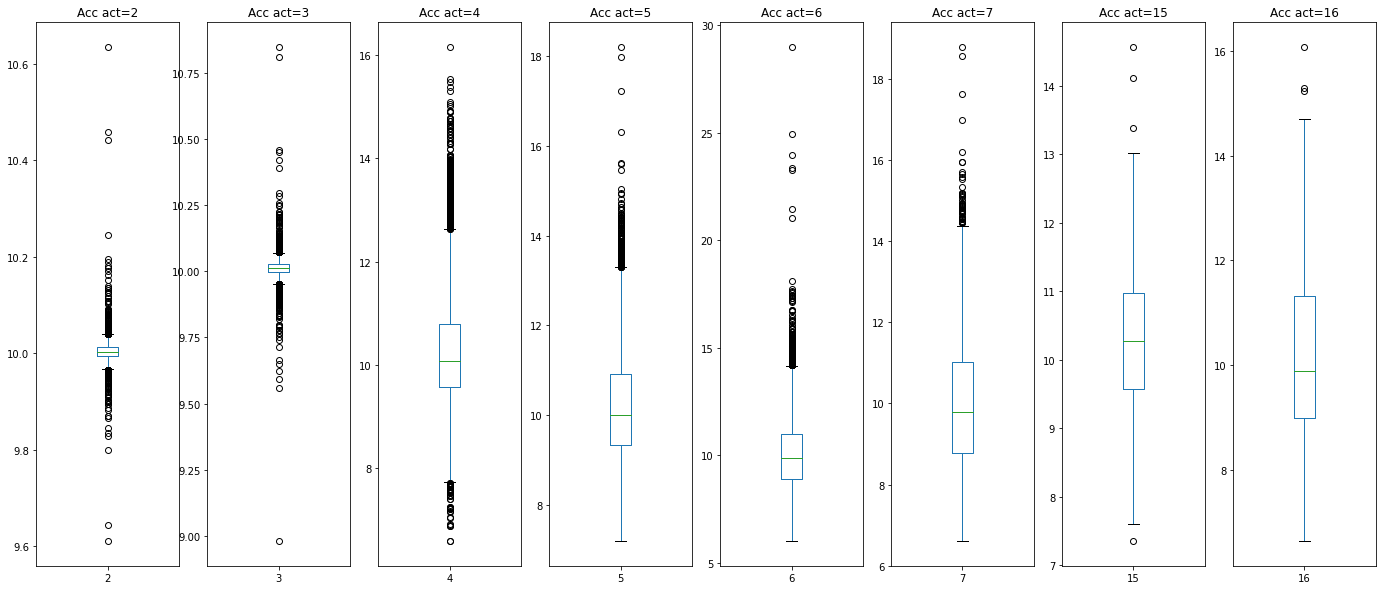

,labels,Acc_N_Out,Acc_N,Acc_Dens,Gyr_N_Out,Gyr_N,Gyr_Dens,Mag_N_Out,Mag_N,Mag_Dens
1,Stand,1353,11012,12.286596,1186,11012,10.770069,2561,11012,23.256448
2,Sit,439,5760,7.621528,507,5760,8.802083,0,5760,0.000000
3,Sit and Talk,605,5760,10.503472,525,5760,9.114583,250,5760,4.340278
4,Walk,802,8706,9.212038,193,8706,2.216862,977,8706,11.222146
5,Walk and Talk,665,9474,7.019210,348,9474,3.673211,664,9474,7.008655
6,Climb Stair,577,6529,8.837494,187,6529,2.864145,0,6529,0.000000
7,Climb Stair and Talk,207,2817,7.348243,143,2817,5.076322,0,2817,0.000000
8,Stand to Sit,124,384,32.291667,60,384,15.625000,79,384,20.572917
9,Sit to Stand,76,384,19.791667,73,384,19.010417,49,384,12.760417
10,Stand to Sit and Talk,112,384,29.166667,78,384,20.312500,77,384,20.052083


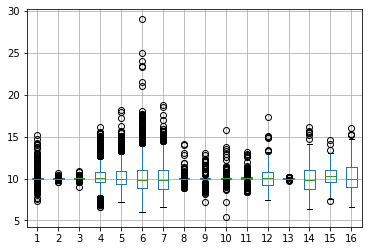

In [7]:
def evaluateDensity(acc,gyr,mag,n_act=16):
    density = [act_labels,[],[],[],[],[],[],[],[],[]]

    for i in range(1,n_act+1):
        [dens_acc,n_acc,n_out_acc] = getDensity(acc, i)
        density[1].append(n_out_acc)
        density[2].append(n_acc)
        density[3].append(dens_acc)

        [dens_gyr,n_gyr,n_out_gyr] = getDensity(gyr, i)
        density[4].append(n_out_gyr)
        density[5].append(n_gyr)
        density[6].append(dens_gyr)

        [dens_mag,n_mag,n_out_mag] = getDensity(mag, i)
        density[7].append(n_out_mag)
        density[8].append(n_mag)
        density[9].append(dens_mag)
    
    density[0] = pd.DataFrame(density[0])
    density[0].columns = ['labels']

    for i in range(1,len(density)):
        density[i] = pd.DataFrame(density[i])
        density[i].columns = [modules_labels[i-1]]
    
    density = pd.concat(density,axis=1)

    acts = [
        # 1,
        2,
        3,
        4,
        5,
        6,
        7,
        # 8,
        # 9,
        # 10,
        # 11,
        # 12,
        # 13,
        # 14,
        15,
        16,
    ]

    plotBoxplot(acc,acts,'Acc')

    acc.boxplot()
    
    # plotBoxplot(gyr,acts,'Gyr')
    
    # plotBoxplot(mag,acts,'Mag')
    
    return density
density = evaluateDensity(acc,gyr,mag)
density['labels'] = act_labels
density.index = density.index + 1
display(density)

<p> As atividades 8 a 11 consistem alternar entre estar em pé e sentado, ou vice-versa, enquanto o indivíduo realiza outras atividades (falar). A densidade de outliers nestes casos é muito alto. Isto pode dever-se a 2 coisas: 

<ul>
<li> O indivíduo pode ter-se movimentado mais rápido nuns momentos do que noutros, gerando uma grande variedade nos valores. 
<li> Como há menos momentos destas atividades (como podemos observar na tabela na columa 'Acc_n'), e dada a situação anterior, os momentos que se tornam outliers tornam-se demasiados em comparação com o número de momentos da atividade em causa.
<ul>

<p> As atividades semelhantes, como <em>Climb Stairs to Walk</em> e <em>Climb Stairs and Talk to Walk and Talk</em> têm densidades semelhantes. Conclui-se, assim, que adicionar a atividade <em>Talk</em> não modifica de forma significativa o número de outliers. Tal acontece também nas outras atividades que apenas é adicionado o <em>Talk</em>, a diferença da densidade de outliers é pequena.

<p> Na atividade <em>Sit</em> (atividade 2) e <em>Sit and Talk</em>, o intervalo de valores é pequeno pois, quando uma pessoa está sentada, não se movimenta pelo que a aceleração existe apenas no eixo <em>zz'</em> (aceleração gravítica).

<p> Nas atividades <em>Climb</em> e <em>Climb and Talk</em>, o intervalo de valores é alto pois o indivíduo tem, geralmente, uma aceleração inconstante quando sobe ou desce escadas, gerando os outliers.

## Z-Score

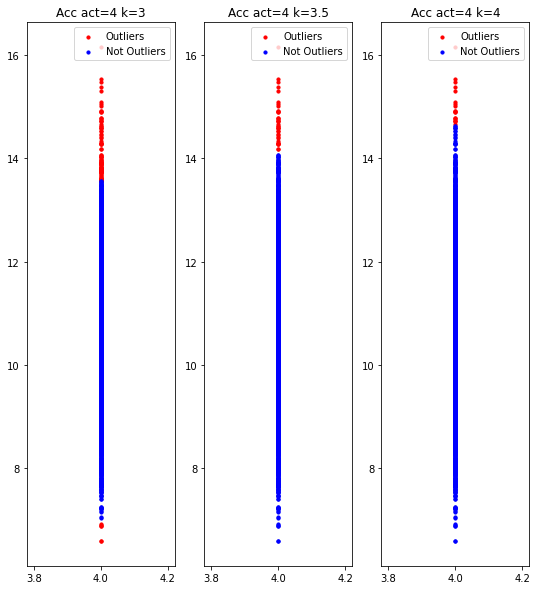

In [8]:
def zscore(vector,k):
    z = (vector - vector.mean()) / vector.std()
    
    out = z.loc[(z < -k) | (z > k)]
    not_out = z.loc[(z >= -k) & (z <= k)]

    return [out.index,not_out.index]

def outliersZscore(vector,vec_name,acts=[1]):
    n_outliers = list() 
        
    plt.figure(figsize=(3*(len(k_values)),10))
    for i in range(len(k_values)):
        k=k_values[i]
        k_out = list()
        for act in acts:
            [out_pos,not_out_pos] = zscore(vector[act],k)

            k_out.append(out_pos.shape[0])

            out = vector.loc[out_pos,]
            not_out = vector.loc[not_out_pos,]


            plt.subplot(1,len(k_values),i+1)
            plt.scatter(np.full((1,out.shape[0]),act),out[act],s=10,c='red',label='Outliers')
            plt.scatter(np.full((1,not_out.shape[0]),act),not_out[act],s=10,c='blue',label='Not Outliers')
            plt.title(vec_name + ' act=' + str(act) + ' k=' + str(k))
            plt.legend()
        
        df = pd.DataFrame(k_out)
        df.columns = [vec_name + ' ' + str(k)]
        df.index = acts
        n_outliers.append(df)

    n_outliers = pd.concat(n_outliers,axis=1)
    return n_outliers
    
acts = [4]
out_acc = outliersZscore(acc,'Acc',acts)
# out_gyr = outliersZscore(gyr,'Gyr',acts)
# out_mag = outliersZscore(mag,'Mag',acts)

# out = pd.concat([out_acc,out_gyr,out_mag],axis=1)
# out

In [9]:
def assign_clusters(data, centroids):
    for index, row in data.iterrows():
        for i in range(len(centroids)):
            d_actual = np.sqrt((row['X'] - centroids[int(row['Clusters'])][0])**2 + (row['Y'] - centroids[int(row['Clusters'])][1])**2 + (row['Z'] - centroids[int(row['Clusters'])][2])**2)
            d_compare = np.sqrt((row['X'] - centroids[i][0])**2 + (row['Y'] - centroids[i][1])**2 + (row['Z'] - centroids[i][2])**2)
            if (d_actual > d_compare):
                data.loc[index, 'Clusters'] = i
                data.loc[index, 'Distance'] = d_compare
    return data

def update_centroids(data, centroids):
    for i in range(len(centroids)):
        centroids[i][0] = data['X'].loc[data['Clusters'] == i].mean()
        centroids[i][1] = data['Y'].loc[data['Clusters'] == i].mean()
        centroids[i][2] = data['Z'].loc[data['Clusters'] == i].mean()
    
    return centroids
        
def k_means(n_clusters, data):
    centroids = [[] for _ in range(n_clusters)]
    
    for i in range(n_clusters):
        centroids[i] = data.sample().to_numpy()[0]
        
    data['Clusters'] = 0
    data['Distance'] = 0
    prev_clusters = data['Clusters'].copy()
    
    while(True):
        data = assign_clusters(data, centroids)
        
        if (data['Clusters'].equals(prev_clusters)):
            break
        
        centroids = update_centroids(data, centroids)
        prev_clusters = data['Clusters'].copy()
        
    return [data, centroids]
    

def outliers_kmeans(n_clusters, data, act):
    data = data.loc[data['Act_Label'] == act]
    
    acc_xyz = data[['Acc_X', 'Acc_Y', 'Acc_Z']]
    acc_xyz = acc_xyz.rename(columns={"Acc_X":"X", "Acc_Y":"Y", "Acc_Z":"Z"})
    gyr_xyz = data[['Gyr_X', 'Gyr_Y', 'Gyr_Z']]
    gyr_xyz = gyr_xyz.rename(columns={'Gyr_X':'X', 'Gyr_Y':'Y', 'Gyr_Z':'Z'})
    mag_xyz = data[['Mag_X', 'Mag_Y', 'Mag_Z']]
    mag_xyz = mag_xyz.rename(columns={'Mag_X':'X', 'Mag_Y':'Y', 'Mag_Z':'Z'})
    
    [acc_xyz, centroids] = k_means(n_clusters, acc_xyz)
#     [gyr_xyz, centroids] = k_means(n_clusters, gyr_xyz)
#     [mag_xyz, centroids] = k_means(n_clusters, mag_xyz)
    
    %matplotlib notebook
    threedee = plt.figure().gca(projection='3d')
    for i in range(n_clusters):
       cluster_label = 'Cluster '+str(i)
       plot_data = acc_xyz.loc[acc_xyz['Clusters'] == i]
       threedee.scatter(plot_data['X'], plot_data['Y'], plot_data['Z'], marker='o', label=cluster_label)
    title = 'Accelerometer kmeans'
    plt.title(title)
    threedee.legend()
    
#     fig2 = plt.figure()
#     ax = plt.axes(projection='3d')
#     for i in range(n_clusters):
#         plot_data = gyr_xyz.loc[gyr_xyz['Clusters'] == i]
#         ax.scatter3D(plot_data['X'], plot_data['Y'], plot_data['Z'])
    
#     fig3 = plt.figure()
#     ax = plt.axes(projection='3d')
#     for i in range(n_clusters):
#         plot_data = mag_xyz.loc[mag_xyz['Clusters'] == i]
#         ax.scatter3D(plot_data['X'], plot_data['Y'], plot_data['Z'])
    
    return acc_xyz
    
centroids = outliers_kmeans(6, data, 1)

KeyboardInterrupt: 

## Exercício 3.8